# create a list that contain all transaction items

Install important modules

In [7]:
!pip install mlxtend
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=b08591031447be12e5f8c6a0f2b47b1498fa99fec3d92997539243ac6fd1703f
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Load Dataset

In [10]:
df = pd.read_csv('/content/Market Basket Analysis - Groceries_dataset (1).csv')
df.info()
df.describe()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


# set date to index

In [3]:
df.isna().sum()


Member_number      0
Date               0
itemDescription    0
dtype: int64

In [42]:
x = df['itemDescription'].value_counts().sort_values(ascending=False)[:10]
print(x)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64


In [43]:
print("Top 10 frequently sold items")
fig = px.bar(x= x.index, y= x.values)
fig.update_layout(title_text= "Top 10 frequently sold Items ", xaxis_title= "Items", yaxis_title="Number of item sold")
fig.show()


Top 10 frequently sold items


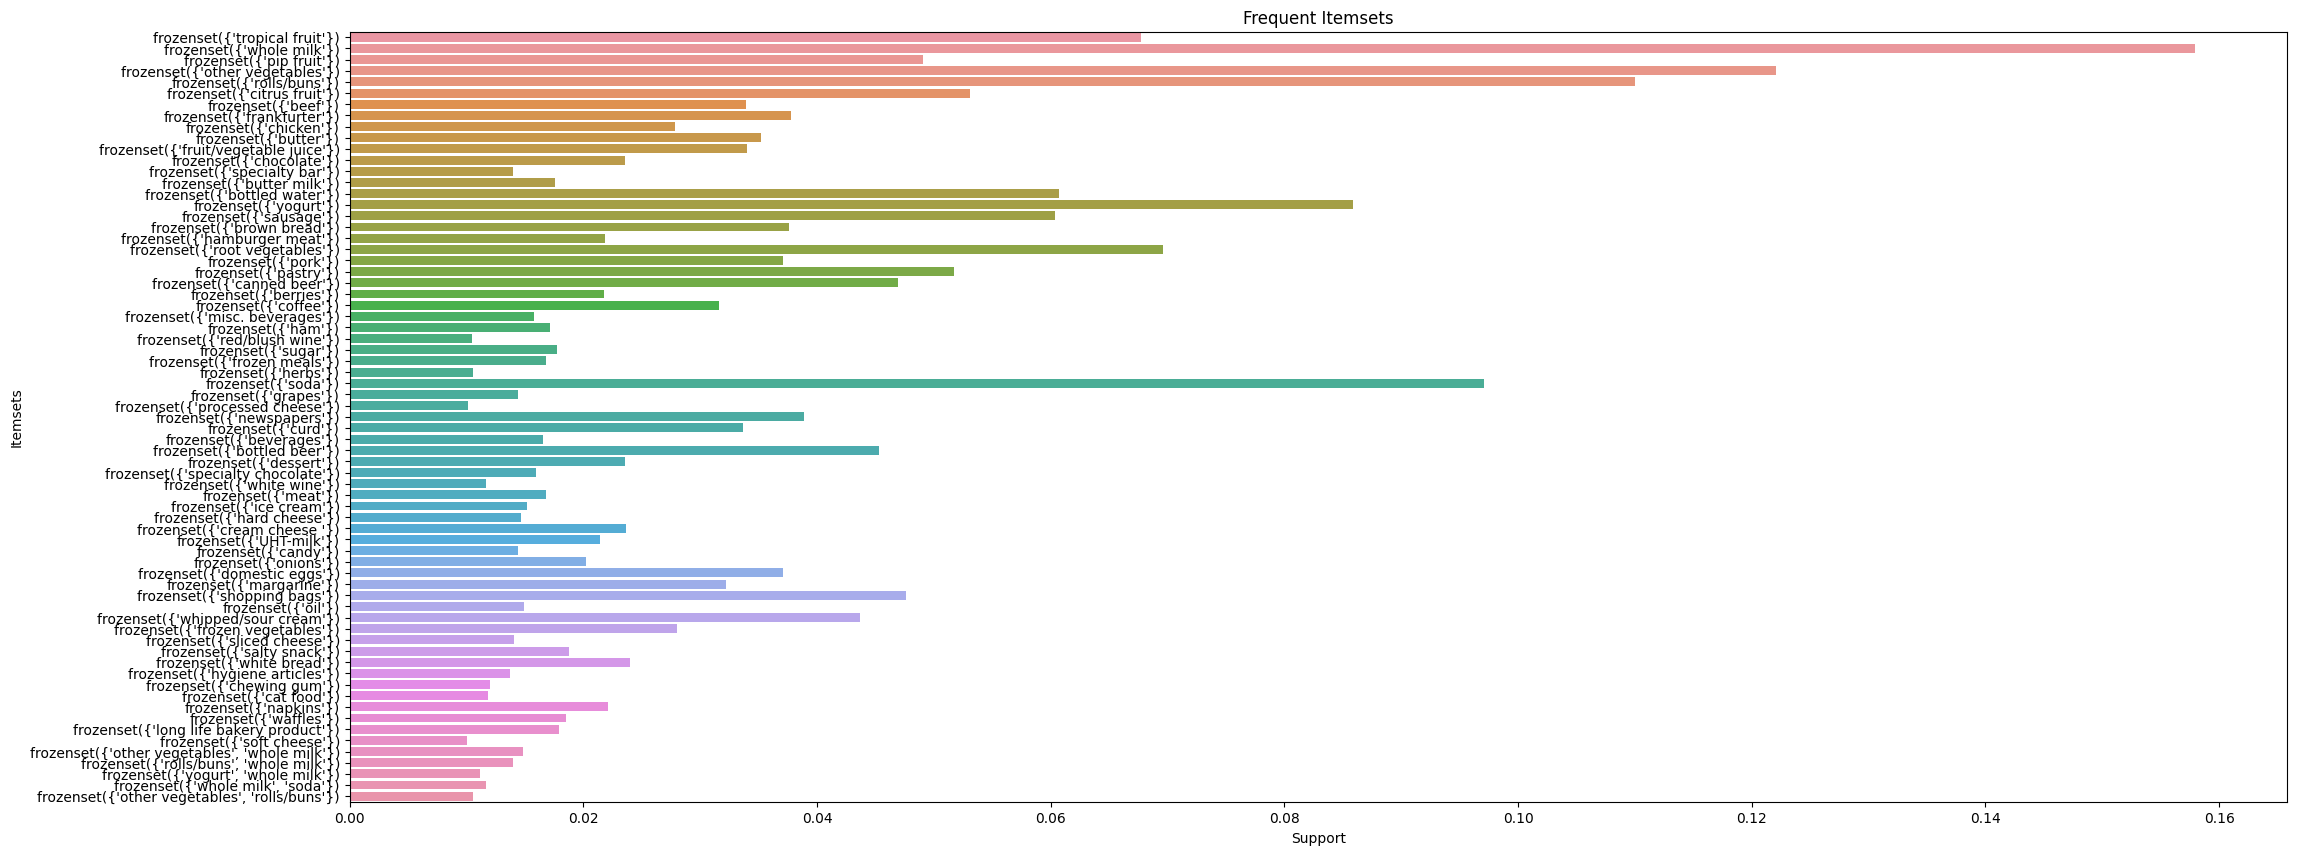

In [44]:
plt.figure(figsize=(25, 10))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets)
plt.title('Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

In [11]:
y = df['itemDescription'].value_counts().sort_values(ascending=True)[:10]
print(y)

preservation products    1
kitchen utensil          1
baby cosmetics           3
bags                     4
frozen chicken           5
make up remover          5
rubbing alcohol          5
toilet cleaner           5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64


In [41]:
print("10 least frequently sold Items")

fig = px.bar(x= y.index, y= y.values)
fig.update_layout(title_text= "10 least frequently sold Items ", xaxis_title= "Items", yaxis_title="Number of item sold")
fig.show()

10 least frequently sold Items


# Exploring count of Member_number

In [12]:
pd.DataFrame(df['Member_number'].value_counts().sort_values(ascending=False))[:10]

,Member_number
3180,36
3050,33
2051,33
3737,33
2625,31
3915,31
2433,31
2271,31
3872,30
2394,29


In [12]:
df["Year"] = df['Date'].str.split("-").str[-1]
print(df)

       Member_number        Date        itemDescription  Year
0               1808  21-07-2015         tropical fruit  2015
1               2552  05-01-2015             whole milk  2015
2               2300  19-09-2015              pip fruit  2015
3               1187  12-12-2015       other vegetables  2015
4               3037  01-02-2015             whole milk  2015
...              ...         ...                    ...   ...
38760           4471  08-10-2014          sliced cheese  2014
38761           2022  23-02-2014                  candy  2014
38762           1097  16-04-2014               cake bar  2014
38763           1510  03-12-2014  fruit/vegetable juice  2014
38764           1521  26-12-2014               cat food  2014

[38765 rows x 4 columns]


In [13]:
df["Month-Year"] = df['Date'].str.split("-").str[1] + "-" + df['Date'].str.split("-").str[-1]
print(df)

       Member_number        Date        itemDescription  Year Month-Year
0               1808  21-07-2015         tropical fruit  2015    07-2015
1               2552  05-01-2015             whole milk  2015    01-2015
2               2300  19-09-2015              pip fruit  2015    09-2015
3               1187  12-12-2015       other vegetables  2015    12-2015
4               3037  01-02-2015             whole milk  2015    02-2015
...              ...         ...                    ...   ...        ...
38760           4471  08-10-2014          sliced cheese  2014    10-2014
38761           2022  23-02-2014                  candy  2014    02-2014
38762           1097  16-04-2014               cake bar  2014    04-2014
38763           1510  03-12-2014  fruit/vegetable juice  2014    12-2014
38764           1521  26-12-2014               cat food  2014    12-2014

[38765 rows x 5 columns]


In [49]:
#Plotting a bar graph with number of sales in each  month of each year
fig1 = px.bar(df["Month-Year"].value_counts(ascending=False),
              orientation= "v",
              color = df["Month-Year"].value_counts(ascending=False),

               labels={'value':'Count', 'index':'Date','color':'Meter'})

fig1.update_layout(title_text="Highest sales by  date")

fig1.show()


In [20]:
Items = df['itemDescription'].unique()
print(df)
Items[:10]

       Member_number        Date        itemDescription  Year Month-Year
0               1808  21-07-2015         tropical fruit  2015    07-2015
1               2552  05-01-2015             whole milk  2015    01-2015
2               2300  19-09-2015              pip fruit  2015    09-2015
3               1187  12-12-2015       other vegetables  2015    12-2015
4               3037  01-02-2015             whole milk  2015    02-2015
...              ...         ...                    ...   ...        ...
38760           4471  08-10-2014          sliced cheese  2014    10-2014
38761           2022  23-02-2014                  candy  2014    02-2014
38762           1097  16-04-2014               cake bar  2014    04-2014
38763           1510  03-12-2014  fruit/vegetable juice  2014    12-2014
38764           1521  26-12-2014               cat food  2014    12-2014

[38765 rows x 5 columns]


array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken'], dtype=object)

In [21]:
df1=df.copy()
one_hot = pd.get_dummies(df1['itemDescription'])
df1.drop(['itemDescription'], inplace =True, axis=1)

df1 = df1.join(one_hot)

df1.head()

,Member_number,Date,Year,Month-Year,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,07-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,01-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,09-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,02-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Filtering values by Member_number and Date

In [22]:
df2 = df1.groupby(['Member_number', 'Date'])[Items[:]].sum()

df2.head(10)


tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
1001          02-05-2015               0           0          0   
              07-02-2014               0           1          0   
              12-12-2014               0           1          0   
              14-04-2015               0           0          0   
              20-01-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
1001          02-05-2015                 0           0           0   
              07-02-2014                 0           1           0   
              12-12-2014                 0           0           0   
              14-04-2015                 0           0           0   
              20-01-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
1001          02-05-2015             0     0            1        0  ...   
              07-02-2014             0     0            0        0  ...   
              12-12-2014             0     0            0        0  ...   
              14-04-2015             0     1            0        0  ...   
              20-01-2015             0     0            1        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
1001          02-05-2015               0     0    0               0   
              07-02-2014               0     0    0               0   
              12-12-2014               0     0    0               0   
              14-04-2015               0     0    0               0   
              20-01-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   
1001          02-05-2015                     0               0           

In [23]:
#Reset the index of the newly formed dataset.
df2 = df2.reset_index()[Items]
df2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Apply the created function on df2 dataset

In [24]:
def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
Items = df2.applymap(encode)

Items.head()



,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(Items, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(tropical fruit),0.110005,0.067767,0.006082,0.055286,0.815816,-0.001373,0.986788,-0.202343
1,(tropical fruit),(rolls/buns),0.067767,0.110005,0.006082,0.089744,0.815816,-0.001373,0.977741,-0.194962
2,(tropical fruit),(fruit/vegetable juice),0.067767,0.034017,0.002139,0.031558,0.927711,-0.000167,0.997461,-0.077138
3,(fruit/vegetable juice),(tropical fruit),0.034017,0.067767,0.002139,0.062868,0.927711,-0.000167,0.994773,-0.074644
4,(chocolate),(tropical fruit),0.023592,0.067767,0.001403,0.059490,0.877860,-0.000195,0.991199,-0.124723
5,(tropical fruit),(chocolate),0.067767,0.023592,0.001403,0.020710,0.877860,-0.000195,0.997058,-0.129866
6,(butter milk),(tropical fruit),0.017577,0.067767,0.001002,0.057034,0.841620,-0.000189,0.988618,-0.160758
7,(tropical fruit),(butter milk),0.067767,0.017577,0.001002,0.014793,0.841620,-0.000189,0.997174,-0.167959
8,(bottled water),(tropical fruit),0.060683,0.067767,0.003542,0.058370,0.861332,-0.000570,0.990020,-0.146315
9,(tropical fruit),(bottled water),0.067767,0.060683,0.003542,0.052268,0.861332,-0.000570,0.991121,-0.147263


750 frequent itemsets was gotten using minimum support of 0.001. Apriori Algorithm was then applied. We can also spot the most correlated rule which is if {whole milk} then {other vegetables}.



#Further filtering

In [26]:
("\n rules:")
rules=rules[rules['lift']>1].reset_index(drop=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969,0.385385
1,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118,0.409366
2,(specialty chocolate),(tropical fruit),0.015973,0.067767,0.001337,0.083682,1.234846,0.000254,1.017368,0.193269
3,(tropical fruit),(specialty chocolate),0.067767,0.015973,0.001337,0.019724,1.234846,0.000254,1.003827,0.204007
4,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,0.000088,1.001326,0.061307
5,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,0.000088,1.004426,0.058402
6,(tropical fruit),(cat food),0.067767,0.011829,0.001002,0.014793,1.250543,0.000201,1.003008,0.214911
7,(cat food),(tropical fruit),0.011829,0.067767,0.001002,0.084746,1.250543,0.000201,1.018551,0.202746
8,(whole milk),(ham),0.157923,0.017109,0.002740,0.017351,1.014142,0.000038,1.000246,0.016560
9,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188


# This shows lift less than 1 (one) , this means that the antecedent reduces the chances ofpurchasing the consequent in the same transaction. It could indicate that the items are seen by customers as alternatives.

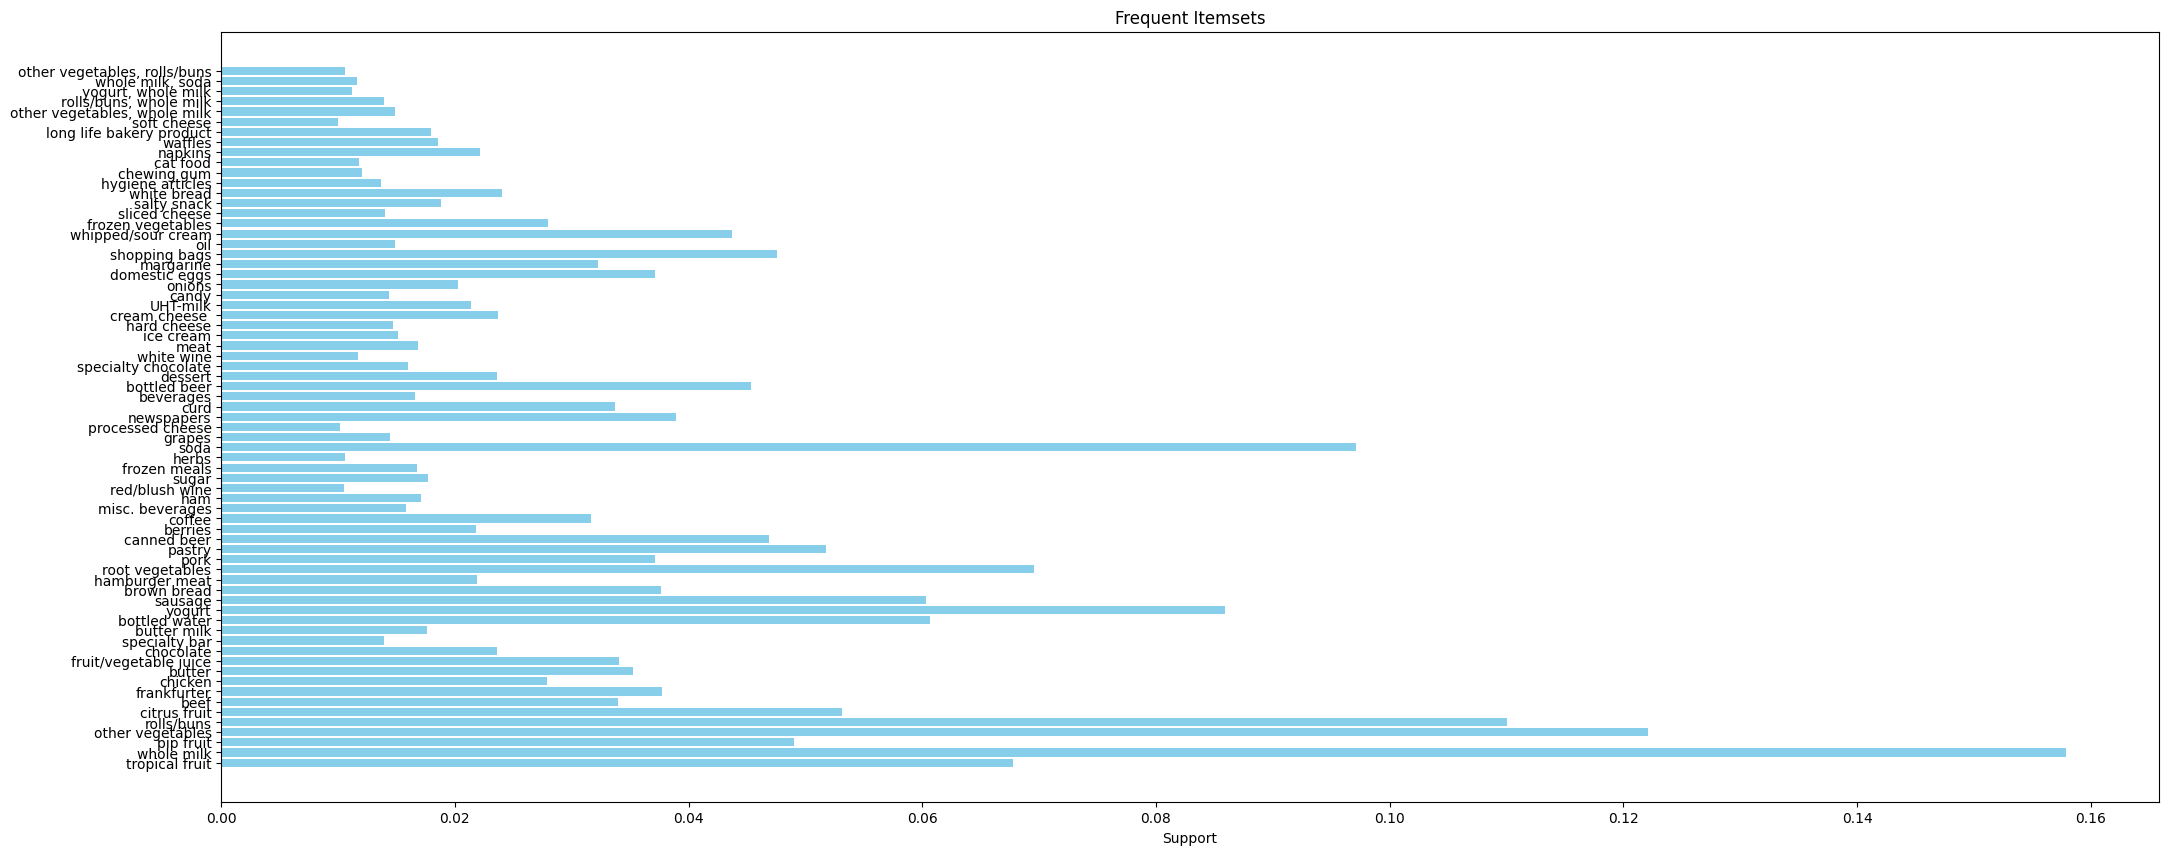

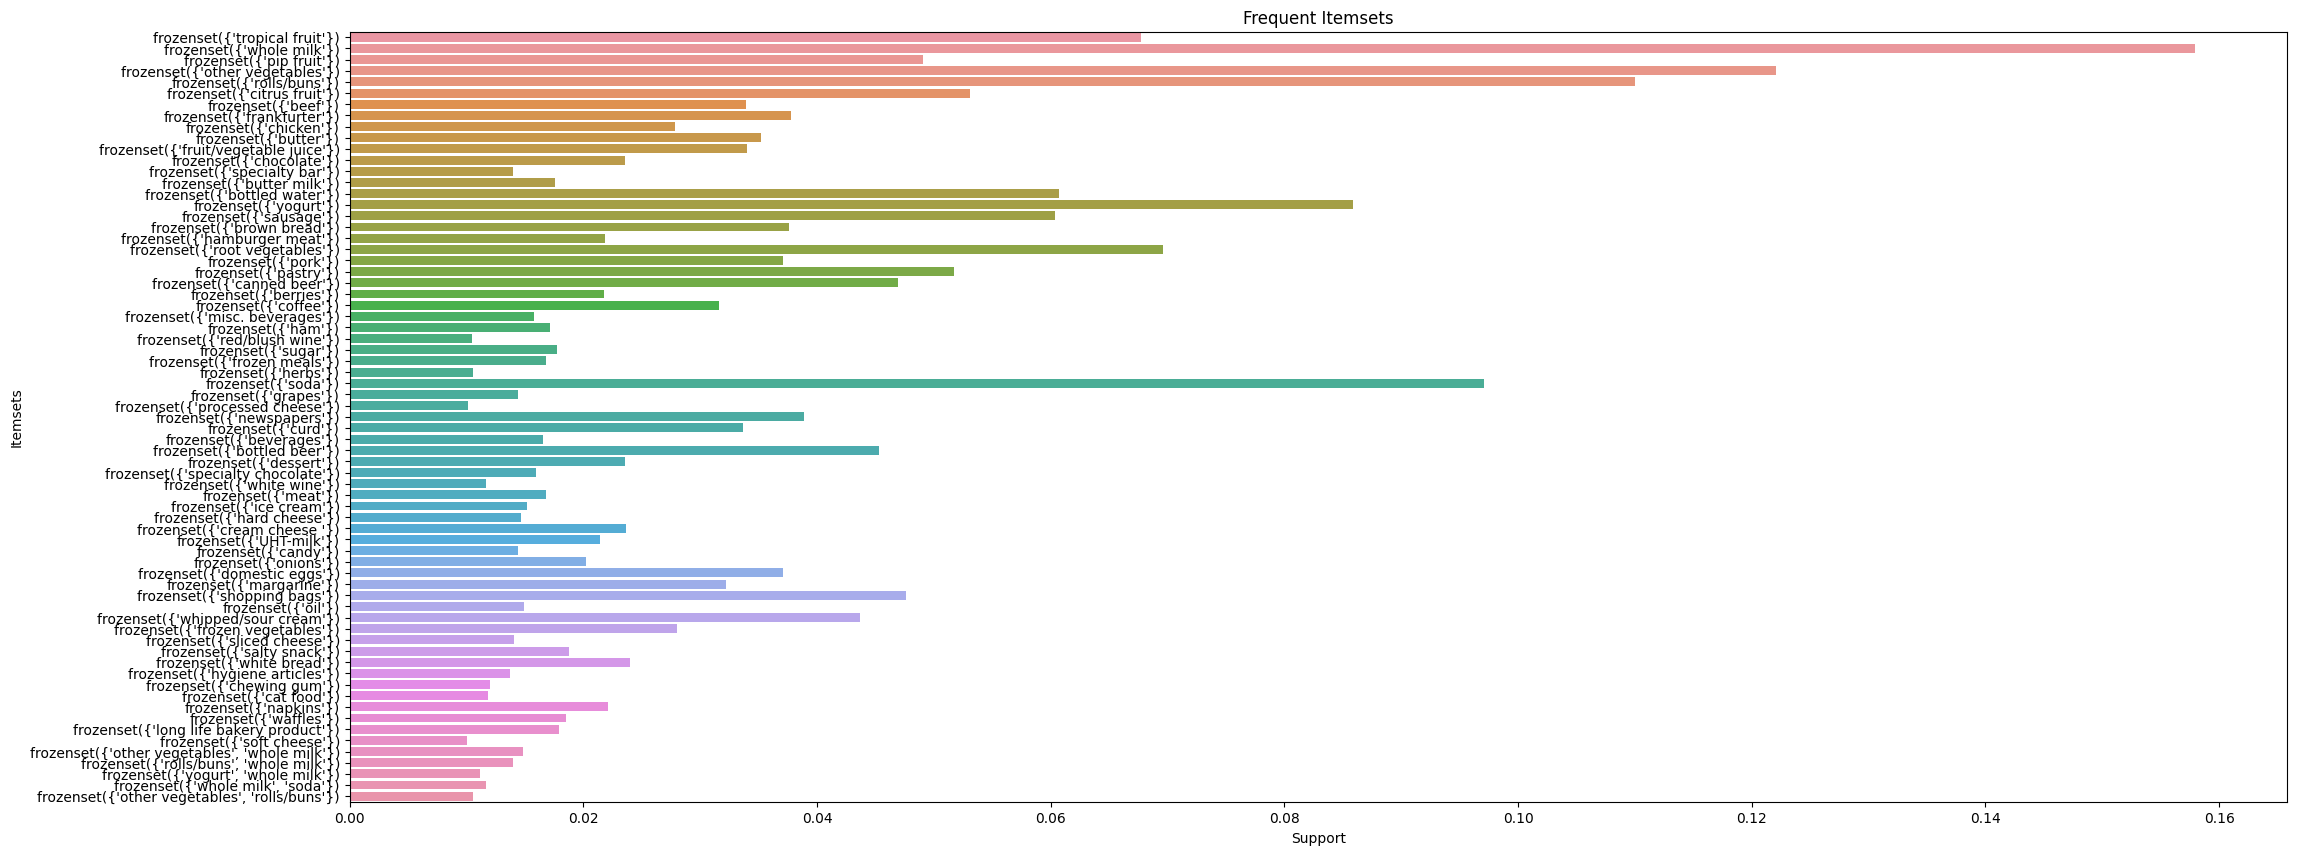

In [42]:
plt.figure(figsize=(25, 10))
support = frequent_itemsets['support']
itemsets = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.barh(itemsets, support, color='skyblue')
plt.xlabel('Support')
plt.title('Frequent Itemsets')
plt.show()
# Visualize frequent itemsets using seaborn (bar plot)
plt.figure(figsize=(25, 10))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets)
plt.title('Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

In [34]:
from mlxtend.frequent_patterns import apriori
min_support = 0.01
frequent_itemsets = apriori(Items, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
     support                        itemsets
0   0.067767                (tropical fruit)
1   0.157923                    (whole milk)
2   0.049054                     (pip fruit)
3   0.122101              (other vegetables)
4   0.110005                    (rolls/buns)
..       ...                             ...
64  0.014837  (other vegetables, whole milk)
65  0.013968        (rolls/buns, whole milk)
66  0.011161            (yogurt, whole milk)
67  0.011629              (whole milk, soda)
68  0.010559  (other vegetables, rolls/buns)

[69 rows x 2 columns]


In [27]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
130,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
131,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
112,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
113,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
23,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
22,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
52,(citrus fruit),(yogurt),0.053131,0.085879,0.004611,0.086792,1.010642,0.000049,1.001001,0.011121
53,(yogurt),(citrus fruit),0.085879,0.053131,0.004611,0.053696,1.010642,0.000049,1.000598,0.011520


#Showing frequent itemsets and its Lenght

In [54]:
frequent_itemsets = apriori(Items, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(Items)

       tropical fruit  whole milk  pip fruit  other vegetables  rolls/buns  \
0                   0           1          0                 0           0   
1                   0           1          0                 0           0   
2                   0           0          0                 0           0   
3                   0           0          0                 0           0   
4                   0           0          0                 0           0   
...               ...         ...        ...               ...         ...   
14958               1           0          0                 1           0   
14959               0           0          0                 0           0   
14960               0           0          0                 0           0   
14961               0           0          0                 0           0   
14962               0           0          0                 1           0   

       pot plants  citrus fruit  beef  frankfurter  chicken  ..

# Visualizing the itemsets with Tree Map

In [87]:
fig = px.treemap(frequent_itemsets, path=['itemsets'], values='support', title='Frequent Itemsets')
fig.show()

# The heat map here also validates the support of

#Visualizing Date and number of Item purchased on some particular date

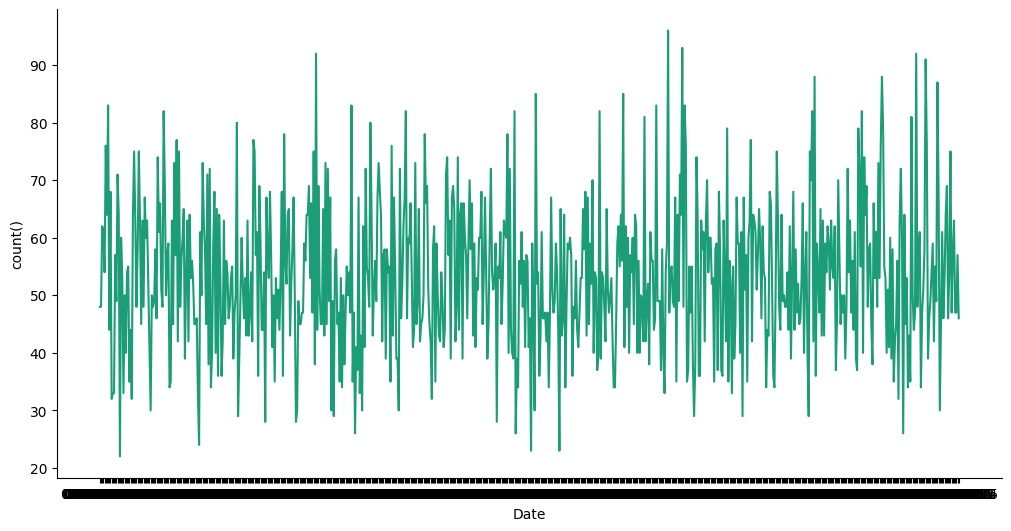

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

# The number of items bought whether more or less could be as a result of seasons e.g Festive seasons etc or the push of markrting campaigns on some products that may have increased purchases. The decrease of some products in some particular date may be as a result of seasons too where the weather dictates what kind of food is mostly consumed e.g winter season.  

#Visualizing with scatter plot

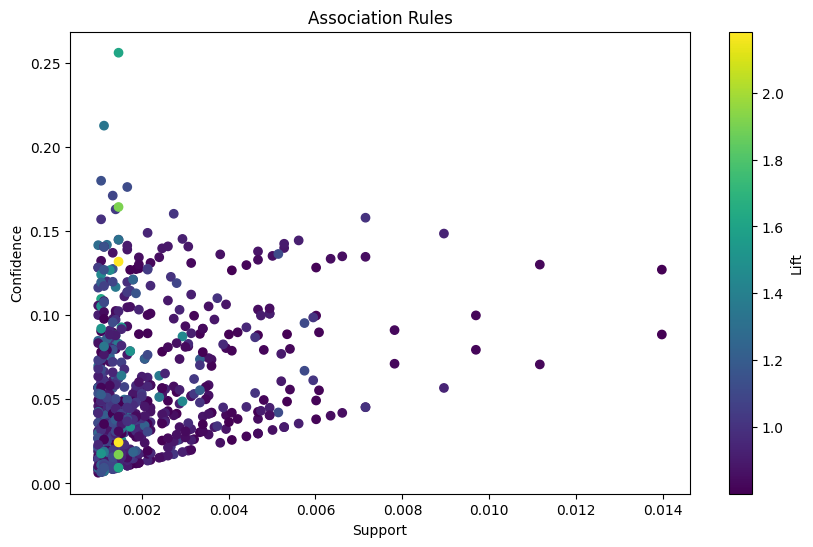

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

rules = association_rules(frequent_itemsets, metric = "confidence",min_threshold = 0.0)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x = "support", y = "confidence",
                size = "lift", data = rules)
plt.show()

# Visuals shows that optimal rules lie on support/confidence boundary. If you look at this plot, you will notice that lift is always high at the support/confidence border.

In [28]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
130,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
131,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
112,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
113,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
23,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
22,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
52,(citrus fruit),(yogurt),0.053131,0.085879,0.004611,0.086792,1.010642,0.000049,1.001001,0.011121
53,(yogurt),(citrus fruit),0.085879,0.053131,0.004611,0.053696,1.010642,0.000049,1.000598,0.011520
